In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",None)

# Project 
## IMDB TV Shows EDA Analysis 

In [54]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\imdb_tvshows.csv")

# Data Info

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8319 non-null   int64 
 1   Rating (out of 10)  8319 non-null   int64 
 2   Review              8319 non-null   object
 3   Show ID             8319 non-null   object
 4   Review ID           8319 non-null   object
dtypes: int64(2), object(3)
memory usage: 325.1+ KB


In [56]:
df.shape

(8319, 5)

In [57]:
df.head()

Unnamed: 0  Rating (out of 10)  \
0           0                   9   
1           1                  10   
2           2                  10   
3           3                   9   
4           4                   9   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [58]:
df.tail()

Unnamed: 0  Rating (out of 10)  \
8314        8314                   5   
8315        8315                   1   
8316        8316                   5   
8317        8317                   4   
8318        8318                   1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Review  \
8314                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                A pointless mess. These people are disgusting in a tropical setting with poor coloring to boot. If I was staying at this resort I'd do a lot of day trips.   
8315                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Just finished Season 3--save yourself the time. Predictable. Lame. WTF is all the hype about?!?I kept waiting for something great. Honestly with each new season I thought something would be dif

# Data Handling & Cleaning 

In [59]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA & Visualization

## Ratings Classification By Show ID

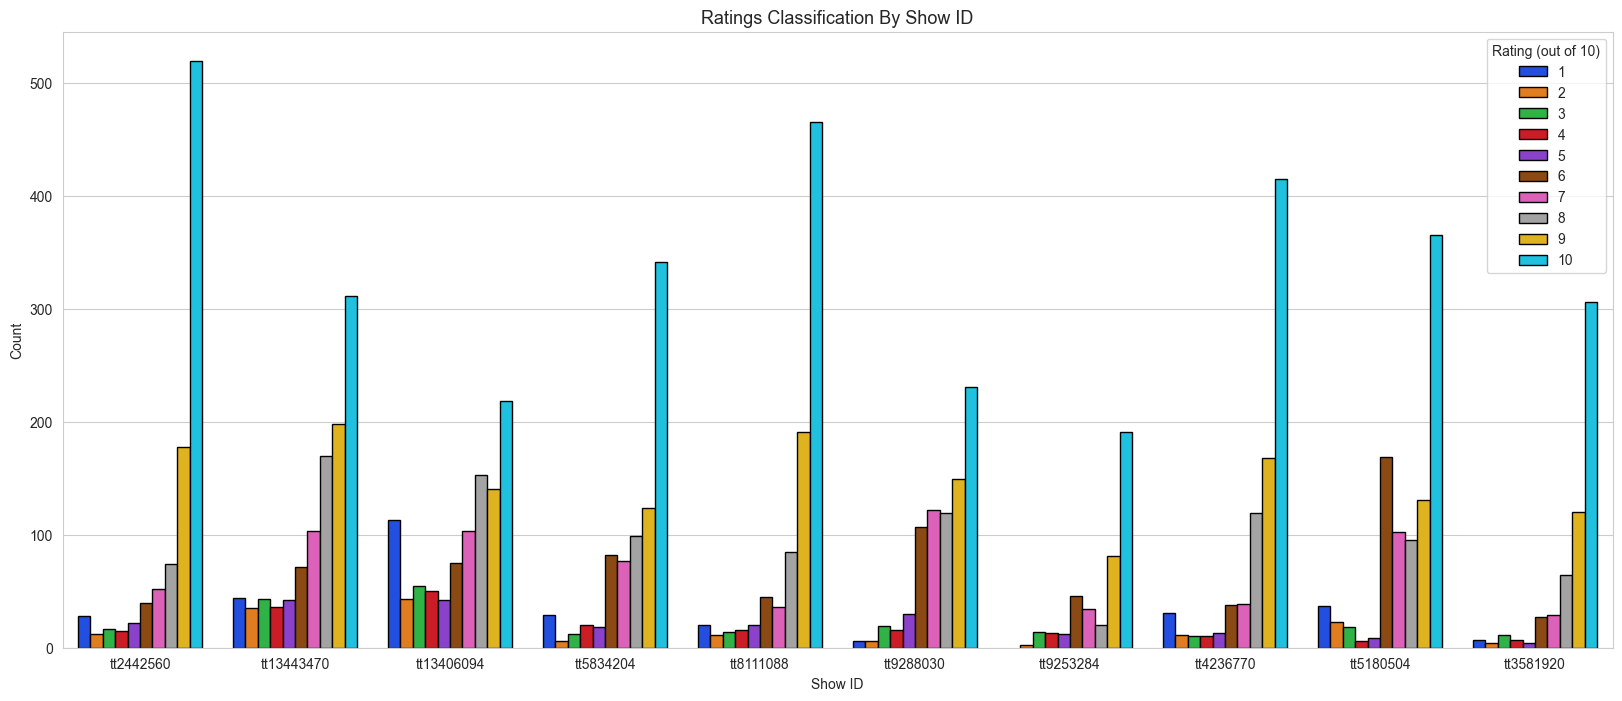

In [60]:
classifi_r=df.groupby(["Show ID","Rating (out of 10)"]).size().reset_index(name="Count").sort_values("Rating (out of 10)",ascending=False)
classifi_r
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(data=classifi_r,x="Show ID",y="Count",hue="Rating (out of 10)",palette="bright",edgecolor="black")
plt.title("Ratings Classification By Show ID",size=13)
plt.show()

## Review Rating Distribution By Count

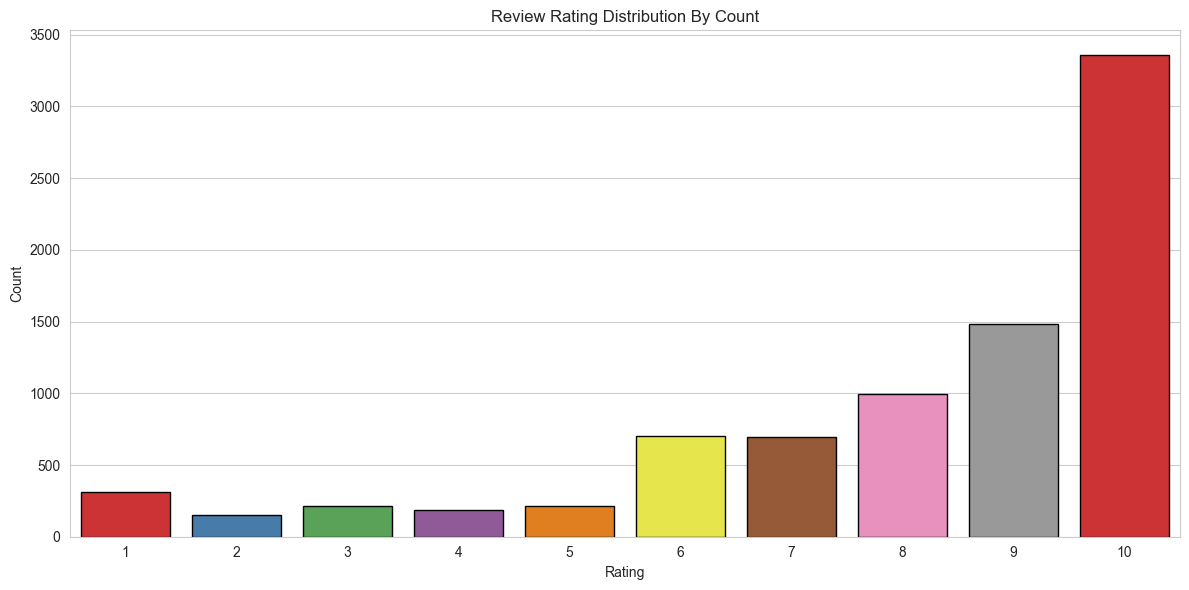

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x='Rating (out of 10)', data=df, palette='Set1',edgecolor="black")
plt.title("Review Rating Distribution By Count")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Most Common Words in Reviews

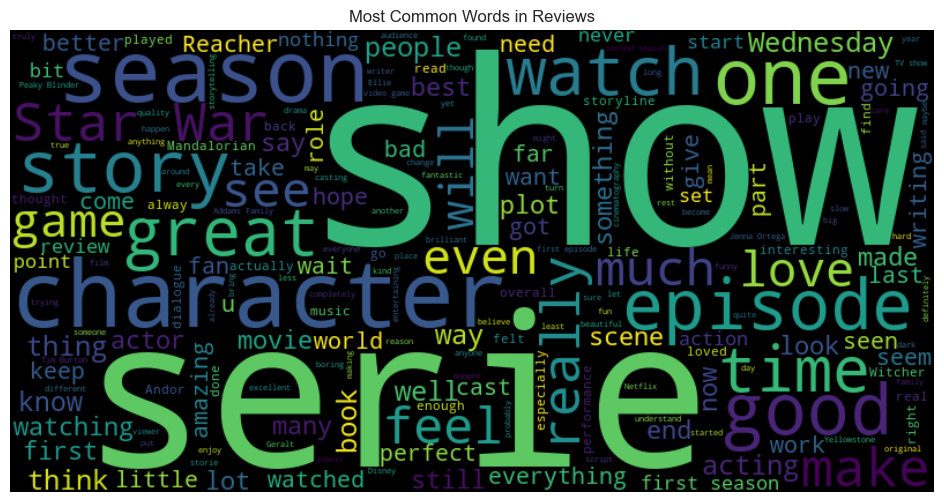

In [62]:
from wordcloud import WordCloud

text = " ".join(df['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews")
plt.show()


## Interactive Review Sentiment by Rating

In [63]:
import plotly.express as px

fig = px.scatter(df, x='Review ID', y='Rating (out of 10)', hover_data=['Review'],
                 title='Interactive Review Sentiment by Rating',
                 color='Rating (out of 10)', color_continuous_scale='Viridis')
fig.show()
